### Кратий план работы:
1. Открыть файл и посмотреть информацию, посмотреть наличие пропусков и дубликатов, зафиксировать начальные данные.
2. Произвести замену или удаление пропусков, а так же изменить дублирующиеся строки.
3. Произвести исследовательский анализ с помощью графиков и гистрограмм.
4. Создать сводные таблицы в заданных разделах.
5. Написать предварительные выводы по каждому разделу, а так же общий вывод.

# Шаг №1

## Открываем файл и смотрим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# open file
try:
    real_estate = pd.read_csv('/datasets/real_estate_data.csv')
except:
    url = 'https://drive.google.com/file/d/1UBRyZCnYUyndFoAhGVWdpwWkFS6lp_mP/view?usp=sharing'
    path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
    real_estate = pd.read_csv(path, sep='\t')

In [3]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [5]:
real_estate.duplicated().sum() #Количество дубликатов

0

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

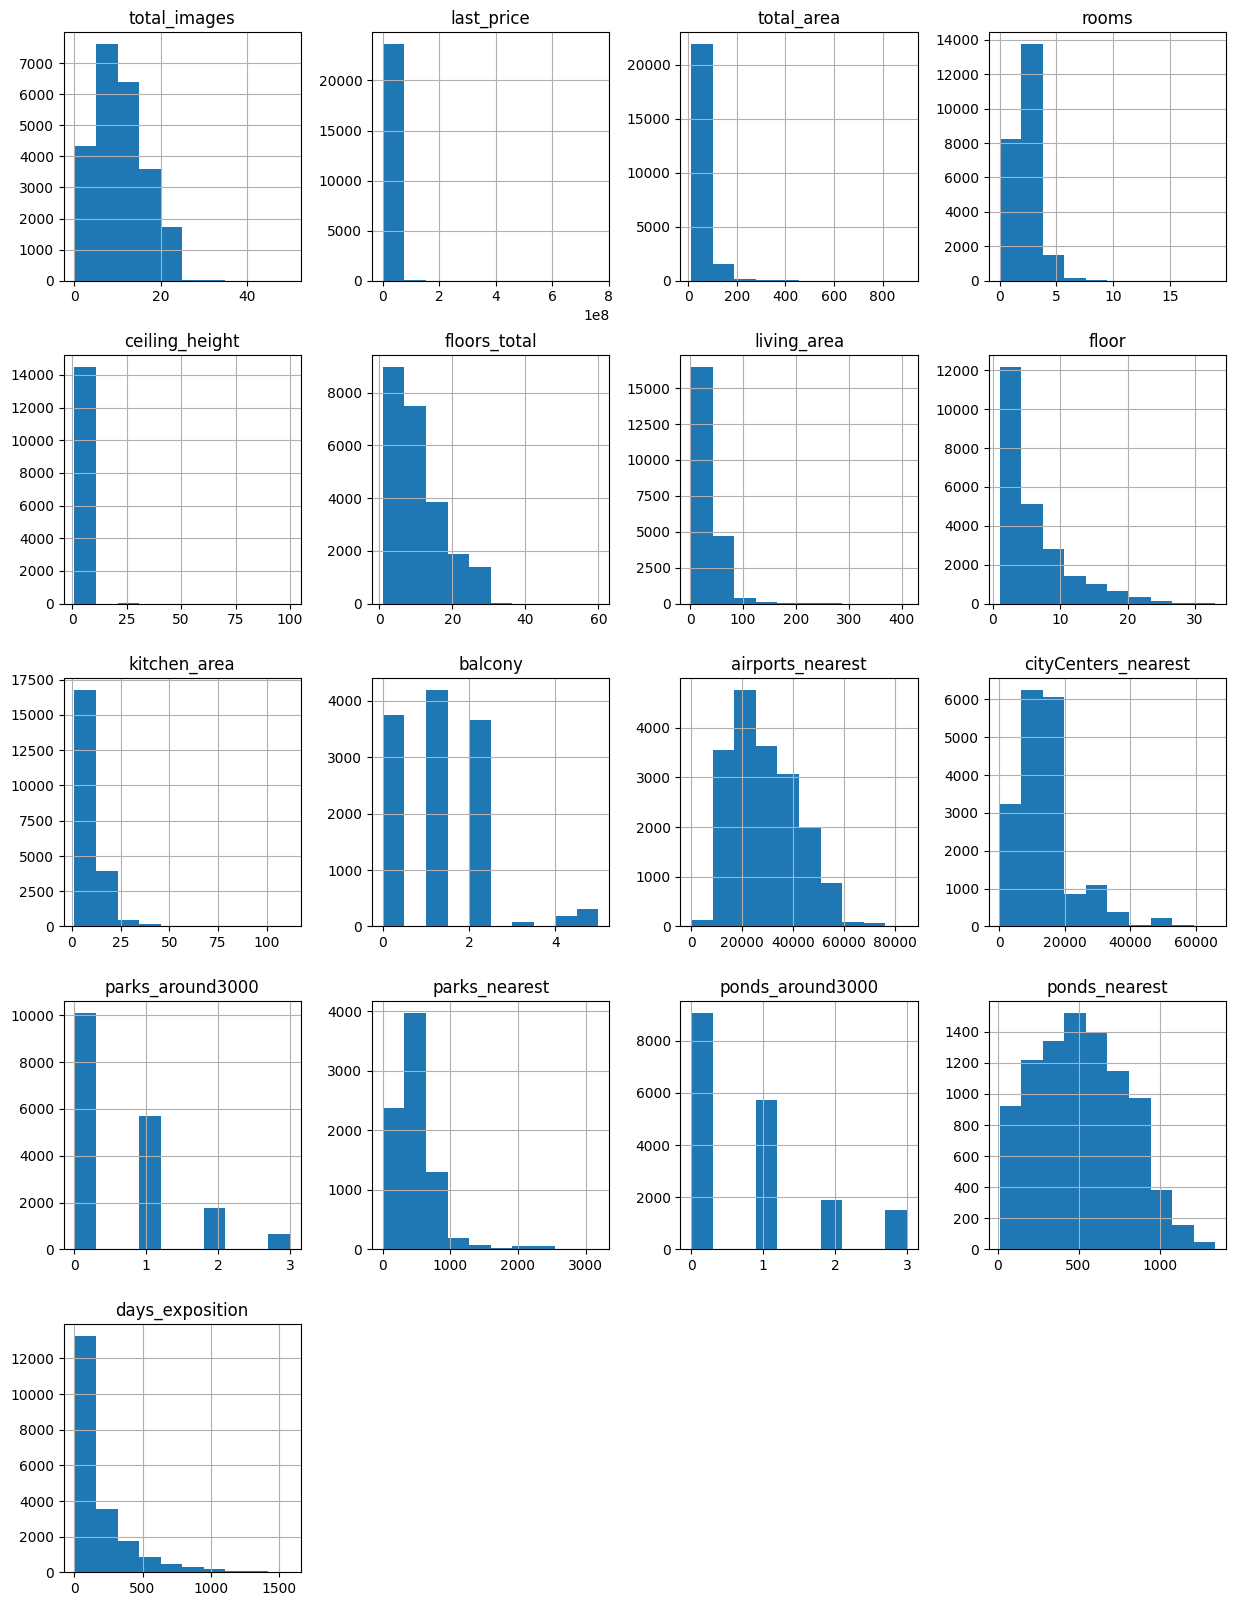

In [6]:
real_estate.hist(figsize=(15, 20)) # Построение гистрограмм

**Вывод:** Таким образом, получена информация о том, что явные дубликаты отсутсвуют, по гистрограммам видно присутсвие аномальных значений, данные пригодны для исследования.

# Шаг №2

In [7]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** В некоторых столбцах присутствуют пропуски

In [8]:
real_estate.isna().sum() # Находим пропуски в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
real_estate = real_estate.rename(columns = {'cityCenters_nearest':'citycenters_nearest'}) # Переименование столбца cityCenters_nearest

In [10]:
shape = real_estate.shape # сохранение в переменную количество 

In [11]:
print('DataFrame Shape :', shape)
print('Число строк :', shape[0])
print('Число столбцов :', shape[1])

DataFrame Shape : (23699, 22)
Число строк : 23699
Число столбцов : 22


## Удаление пропусков в столбцах

### Измененение типа данных в столбце `first_day_exposition` с object на datetime

In [12]:
real_estate['first_day_exposition'] = pd.to_datetime(real_estate['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
real_estate['first_day_exposition'].unique()

array(['2019-03-07T00:00:00.000000000', '2018-12-04T00:00:00.000000000',
       '2015-08-20T00:00:00.000000000', ...,
       '2014-12-29T00:00:00.000000000', '2016-09-12T00:00:00.000000000',
       '2015-07-19T00:00:00.000000000'], dtype='datetime64[ns]')

### Столбец `ceiling_height` имеет пропуски

In [14]:
real_estate['ceiling_height'].unique() # Есть пропуски, просматриваем уникальные значения

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [15]:
real_estate['ceiling_height'] = (
    real_estate['ceiling_height']
    .fillna(value=real_estate['ceiling_height']
    .median())
) # Замена в столбце ceiling_height медианным значением

In [16]:
real_estate['ceiling_height'].head(10)

0    2.70
1    2.65
2    2.65
3    2.65
4    3.03
5    2.65
6    2.65
7    2.65
8    2.65
9    2.50
Name: ceiling_height, dtype: float64

### Столбец `balcony` имеет пропуски

In [17]:
real_estate['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [18]:
real_estate['balcony'] = (
    real_estate['balcony']
    .fillna(value=0)
    .astype(int)
) # заменены пропуски приведены и преобразованы типы данных

In [19]:
real_estate['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int32

### Столбец `living_area` имеет пропуски

In [20]:
real_estate['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [21]:
real_estate['living_area'].head() # Площадь жилого помещения

0    51.0
1    18.6
2    34.3
3     NaN
4    32.0
Name: living_area, dtype: float64

In [22]:
real_estate[['living_area', 'total_area']].describe()

,living_area,total_area
count,21796.000000,23699.000000
mean,34.457852,60.348651
std,22.030445,35.654083
min,2.000000,12.000000
25%,18.600000,40.000000
50%,30.000000,52.000000
75%,42.300000,69.900000
max,409.700000,900.000000


In [23]:
real_estate['living_area'] = real_estate['living_area'] \
    .fillna(value=real_estate['total_area'] / 
            (real_estate['total_area'].median() / 
             real_estate['living_area'].median()))

In [24]:
real_estate['living_area'].isna().sum() # Проверка на пропуски

0

**Вывод:** Заменены пропуски соотношением общей площади к соотношению медианных значений общей площади к медианному значению жилой площади.

### Столбец `ceiling_height` имеет пропуски

In [25]:
real_estate['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [26]:
real_estate['ceiling_height'] = (
    real_estate['ceiling_height']
    .fillna(value=real_estate['ceiling_height']
    .median())
) # Замена в столбце ceiling_height медианным значением

### Столбец `floors_total` имеет пропуски

In [27]:
real_estate['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

In [28]:
real_estate.dropna(subset=['floors_total'], inplace=True) # Удаление пропусков в столбце

In [29]:
real_estate['floors_total'].isna().sum()

0

**Вывод:** Пропусков крайне мало, удаляем без потери качества

### Столбец `is_apartment` имеет пропуски

In [30]:
real_estate['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [31]:
real_estate['is_apartment'] = (
    real_estate['is_apartment']
    .fillna(False)
    .astype(bool)
)

**Вывод:** В результате все значения 'NaN' будут заменены на булево значение False.

In [32]:
real_estate['is_apartment'].head()

0    False
1    False
2    False
3    False
4    False
Name: is_apartment, dtype: bool

In [33]:
real_estate.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,91.730769,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Замена пропусков в столбце `kitchen_area`

In [34]:
real_estate['kitchen_area'].unique()

array([ 25.  ,  11.  ,   8.3 ,    nan,  41.  ,   9.1 ,  14.4 ,  18.9 ,
         8.81,   6.5 ,   8.5 ,   6.  ,   9.  ,   5.2 ,   8.  ,   7.6 ,
         5.6 ,  12.  ,   5.7 ,   6.1 ,  19.6 ,  15.  ,   7.  ,   9.2 ,
        11.7 ,  13.4 ,  17.  ,   6.3 ,  11.6 ,   8.8 ,  10.  ,  17.6 ,
         7.5 ,   9.5 ,  50.  ,  15.5 ,  10.7 ,  11.1 ,  20.  ,  11.9 ,
        16.  ,   5.3 ,  11.5 ,   7.2 ,   6.2 ,  10.4 ,   7.1 ,   4.9 ,
         7.3 ,  11.95,  10.2 ,   6.4 ,   5.5 ,  13.  ,   8.4 ,  23.6 ,
        10.8 ,  18.3 ,   5.  ,   8.2 ,  24.  ,  23.8 ,   6.6 ,  26.85,
        15.4 ,   7.8 ,  33.8 ,   5.4 ,  12.72,  12.2 ,  19.  ,  12.4 ,
         7.9 ,  10.3 ,   9.8 ,  17.5 ,  14.7 ,  20.91,  21.3 ,  10.6 ,
        10.9 ,   9.7 ,   7.7 ,  12.5 ,  11.4 ,   8.6 ,  11.24,  14.1 ,
        15.7 ,  13.29,  14.  ,  12.9 ,  12.7 ,  16.5 ,   9.36,  21.5 ,
        35.  ,  10.5 ,   8.7 ,  19.3 ,  21.4 ,  40.  ,  49.2 ,  11.52,
         8.9 ,   9.6 ,  30.  ,  14.2 ,   8.1 ,  10.44,   4.5 ,  16.3 ,
      

In [35]:
real_estate.corr()['kitchen_area'].sort_values(ascending=False).head(10) # Нахождение зависимости между столбцами

kitchen_area        1.000000
total_area          0.609468
last_price          0.520018
living_area         0.436477
rooms               0.269672
floors_total        0.163944
ponds_around3000    0.150576
floor               0.135486
total_images        0.105773
days_exposition     0.100641
Name: kitchen_area, dtype: float64

In [36]:
real_estate['kitchen_area'] = real_estate['kitchen_area'] \
    .fillna(value=real_estate['total_area'] / 
            (real_estate['total_area'].median() / 
             real_estate['kitchen_area'].median()))

In [37]:
real_estate['kitchen_area'].isna().sum() # Проверка на пропуски

0

**Вывод:** Вывод: Заменены пропуски соотношением общей площади к соотношению медианных значений общей площади к медианному значению площади кухни.

### Замена пропусков в столбце `airports_nearest`

In [38]:
real_estate.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.000,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,...,11.000,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,...,8.300,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,91.730769,9,False,...,27.825,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,...,41.000,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,...,9.100,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.600000,6,False,...,14.400,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,41.307692,22,False,...,18.900,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,...,8.810,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,...,6.500,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод:** В некоторых строках столбца `locality_name` отсутствуют соответствующие значения в столбце `airports_nearest`. Это может быть связано с тем, что информация об аэропортах просто не была предоставлена для этих локаций. Поэтому, изменение этого столбца может привести к потере важной информации.

### Замена пропусков в столбце `citycenters_nearest`

**Вывод:** Данный столбец, скорее всего, содержит пропуски, так как в некоторых поселках и деревнях может не быть четко определенного центра. Поэтому, было бы неверно пытаться присвоить значение этому столбцу для всех записей. Лучше оставить этот столбец без изменений, чтобы сохранить исходные данные без ошибок.

### Замена пропусков в столбце `parks_around3000`

In [39]:
real_estate['parks_around3000'] = (
    real_estate['parks_around3000']
    .fillna(value=0)
    .astype(int)
)    

In [40]:
real_estate['parks_around3000'].head()

0    1
1    0
2    1
3    2
4    2
Name: parks_around3000, dtype: int32

**Вывод:** В радиусе 3 км, вероятно, нет парков, поэтому заменяем пропуски на 0.

### Замена пропусков в столбце `parks_nearest`

**Вывод:** Вероятно, отсутствие парков поблизости является причиной появления этих пропусков, данные остаются без изменений

### Замена пропусков в столбце `ponds_around3000`

**Вывод:** Большой размах выборки, данный столбец остается без изменений.

### Замена пропусков в столбце `ponds_nearest`

**Вывод:** В данном столбце могут отсутствовать данные, так как в указанных местах могут не существовать водоемы. Данный столбец останется без изменений.

### Замена пропусков в столбце `days_exposition`

**Вывод:** Этот столбец может содержать пропущенные значения, так как они обозначают объекты, которые не были проданы. Содержание этого столбца не будет меняться.

### Замена дублирующихся строк в столбце и пропусков `locality_name`

In [41]:
set(real_estate['locality_name'].unique()) # Просмотр уникальных значений по алфавиту

{nan,
 'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'г

In [42]:
real_estate.dropna(subset=['locality_name'], inplace=True) # Удаление пропусков

In [43]:
real_estate['locality_name'] = (
    real_estate['locality_name']
    .str.lower() # Приведение к нижнему регистру
    .str.replace('ё', 'е') # Замена 
    .apply(lambda x: x.split(' ')[-1]) # Редактирование строки

) 

In [44]:
set(real_estate['locality_name'].unique())

{'агалатово',
 'александровская',
 'алексеевка',
 'аннино',
 'аро',
 'барышево',
 'батово',
 'бегуницы',
 'белогорка',
 'белоостров',
 'бокситогорск',
 'бор',
 'бугры',
 'будогощь',
 'ваганово',
 'важины',
 'вартемяги',
 'верево',
 'вещево',
 'виллози',
 'вознесенье',
 'возрождение',
 'войсковицы',
 'войскорово',
 'володарское',
 'волосово',
 'волхов',
 'вруда',
 'всеволожск',
 'выборг',
 'вырица',
 'выскатка',
 'высокоключевой',
 'высоцк',
 'гаврилово',
 'гарболово',
 'гатчина',
 'гладкое',
 'глажево',
 'глебычево',
 'глинка',
 'гончарово',
 'горбунки',
 'горка',
 'гостилицы',
 'грива',
 'громово',
 'девяткино',
 'дзержинского',
 'долина',
 'дружноселье',
 'дубровка',
 'елизаветино',
 'ефимовский',
 'жилгородок',
 'жилпоселок',
 'житково',
 'заводской',
 'заклинье',
 'заневка',
 'запорожское',
 'зеленогорск',
 'зимитицы',
 'ивангород',
 'ижора',
 'извара',
 'ильичево',
 'иссад',
 'калитино',
 'каложицы',
 'кальтино',
 'каменногорск',
 'камышовка',
 'кара',
 'карлино',
 'каськово',
 'к

In [45]:
real_estate.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
citycenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

<div class="alert alert-info"; style="border-left: 3px solid SteelBlue">
<h4><font color="#FFA500">Вывод по второму шагу:</font></h4>    

Выполнена предобработка данных, так, например, если информация являлась критичной для анализа, то пропуски были заменены на медианы или наиболее вероятные значения. Если же пропуски не влияли на интерпретацию данных, то они были оставлены как пустые значения без замены. 

Случайные пропуски данных происходят из-за непредвиденных обстоятельств, которые не имеют отношения к самим данным. Например, это может быть человеческий фактор, ошибка ввода данных или проблема с оборудованием, программное обеспечение (так как некоторые столбцы заполнялись автоматически системой)
</div>

# Шаг №3:

## Добавление столбца цена одного квадратного метра

In [46]:
real_estate['price_of_metre'] = (real_estate['last_price'] / real_estate['total_area']).round(2)

In [47]:
real_estate['price_of_metre'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: price_of_metre, dtype: float64

## Создание столбца день недели публикации объявления 

In [48]:
real_estate['day_publication'] = real_estate['first_day_exposition'].dt.weekday 

In [49]:
real_estate['day_publication'].head()

0    3
1    1
2    3
3    4
4    1
Name: day_publication, dtype: int64

## Создание столбца месяц публикации объявления

In [50]:
real_estate['month_publication'] = real_estate['first_day_exposition'].dt.month

## Создание столбца год публикации объявления

In [51]:
real_estate['year_publication'] = real_estate['first_day_exposition'].dt.year

In [52]:
real_estate['year_publication'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year_publication, dtype: int64

## Создание столбца тип этажа квартиры

In [53]:
def floor_type(row): # Функция, которая будет принимать строку
    if row['floor'] == 1: # Если равно 1 этажу
        return 'первый'
    if row['floor'] == row['floors_total']: # Если равно этажу равному этажей в доме
        return 'последний'
    else: # Все остальные уходят в категорию другие
        return 'другой'

In [54]:
real_estate['floor_type'] = real_estate.apply(floor_type, axis=1) # Подставление в функцию по столбцу

In [55]:
real_estate['floor_type'].head(15)

0        другой
1        первый
2        другой
3        другой
4        другой
5        другой
6        другой
7        другой
8        другой
9        другой
10       другой
11       другой
12    последний
13    последний
14       первый
Name: floor_type, dtype: object

## Создание столбца расстояние до центра города в километрах

In [56]:
real_estate['distance_to_center'] = (real_estate['citycenters_nearest'] / 1000).round(0) # в 1км 1000 метров, округление

In [57]:
real_estate['distance_to_center'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: distance_to_center, dtype: float64

In [58]:
real_estate.info() # Проверка наличия столбцов и правильный тип

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

**Вывод:** Все стольцы присутствуют, можно переходить к исследовательскому анализу данных

# Шаг 4:

In [59]:
real_estate.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.00,6.00,9.00,1.400000e+01,50.0
last_price,23565.0,6.540058e+06,1.091093e+07,12190.00,3400000.00,4646000.00,6.790000e+06,763000000.0
total_area,23565.0,6.032282e+01,3.565706e+01,12.00,40.00,52.00,6.970000e+01,900.0
rooms,23565.0,2.070656e+00,1.078591e+00,0.00,1.00,2.00,3.000000e+00,19.0
ceiling_height,23565.0,2.724530e+00,9.910260e-01,1.00,2.60,2.65,2.700000e+00,100.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.00,5.00,9.00,1.600000e+01,60.0
living_area,23565.0,3.462111e+01,2.239983e+01,2.00,19.00,30.00,4.211538e+01,409.7
floor,23565.0,5.878124e+00,4.871485e+00,1.00,2.00,4.00,8.000000e+00,33.0
kitchen_area,23565.0,1.049950e+01,6.037444e+00,1.30,7.00,9.00,1.200000e+01,112.0
balcony,23565.0,5.936771e-01,9.606601e-01,0.00,0.00,0.00,1.000000e+00,5.0


In [60]:
real_estate.describe().T[2:3] # Отфильтровываем нужный столбец

,count,mean,std,min,25%,50%,75%,max
total_area,23565.0,60.322824,35.65706,12.0,40.0,52.0,69.7,900.0


## Анализ общей площади квартир

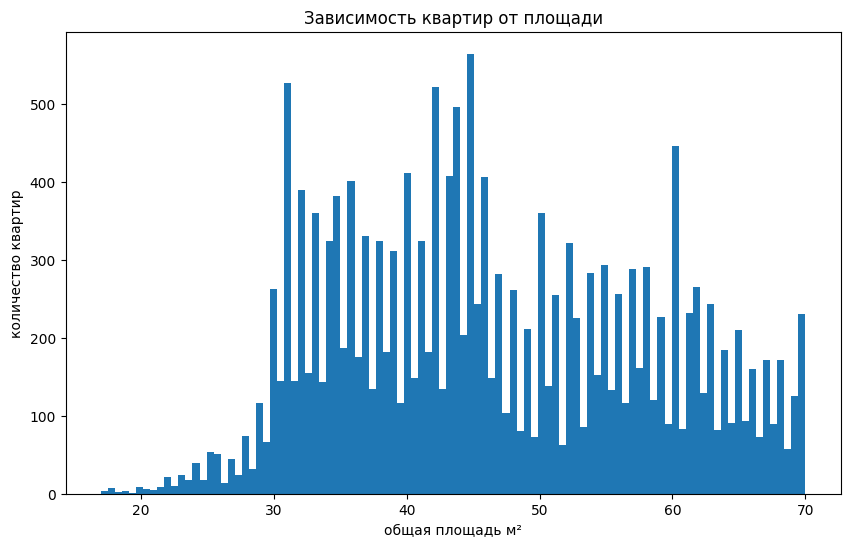

In [61]:
# Построение гистограммы с диапазаноми от 17 до 70
real_estate.total_area \
    .plot(
    title='Зависимость квартир от площади',
    kind='hist', 
    bins=100, 
    range=(17,70),
    figsize=(10, 6)       
)
plt.xlabel('общая площадь м²')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** Как видно на гистрограмме самое большое предложение количество квартир начинается после 40м² и заканчивается после 69 м².

## Анализ общей живой площади квартир

In [62]:
real_estate.describe().T[6:7] # Отфильтровываем нужный столбец

,count,mean,std,min,25%,50%,75%,max
living_area,23565.0,34.621108,22.399827,2.0,19.0,30.0,42.115385,409.7


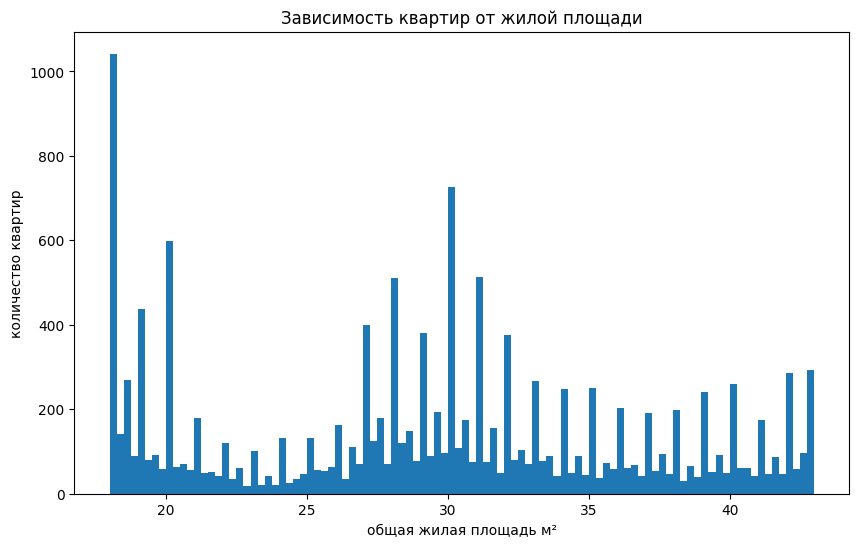

In [63]:
# Построение гистограммы с диапазаноми от 18 до 43
real_estate.living_area \
    .plot(
    title='Зависимость квартир от жилой площади',
    kind='hist', 
    bins=100, 
    range=(18,43),
    figsize=(10, 6)       
)
plt.xlabel('общая жилая площадь м²')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** Как видно на гистрограмме пик продажи квартир с жилой площадью 18м² и 30м², жилые помещения с площадью примерно 23м² имеют самый низкий пик, значит и продают их не так много. 

## Анализ площади кухни

In [64]:
real_estate.describe().T[8:9] # Отфильтровываем нужный столбец

,count,mean,std,min,25%,50%,75%,max
kitchen_area,23565.0,10.499499,6.037444,1.3,7.0,9.0,12.0,112.0


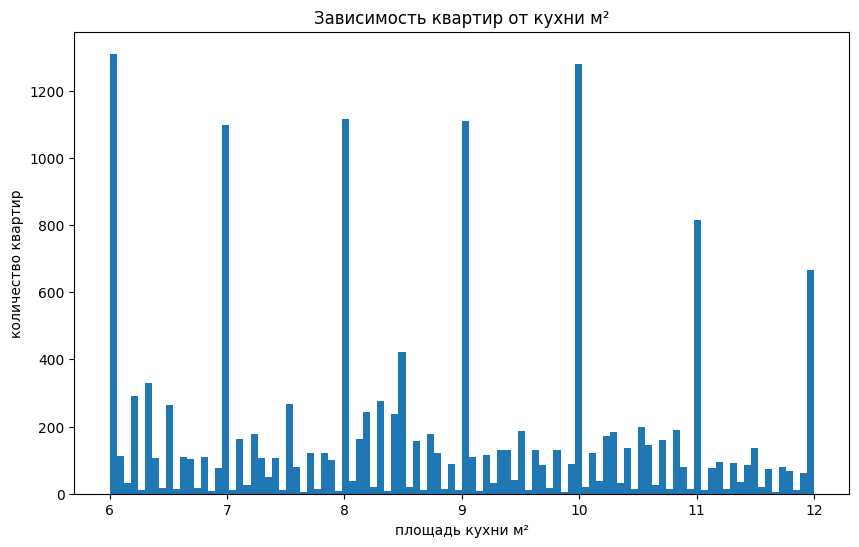

In [65]:
# Построение гистограммы с диапазаноми от 6 до 12
real_estate.kitchen_area \
    .plot(
    title='Зависимость квартир от кухни м²',
    kind='hist', 
    bins=100, 
    range=(6,12),
    figsize=(10, 6)       
)
plt.xlabel('площадь кухни м²')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** На гистрограмме видно, что больше всего предложений на жилые помещения с кухней 6м², затем 10м², затем 8м², 9м², 7м², 11м² и 12м².

## Анализ цены объекта на момент снятия публикации

In [66]:
real_estate.last_price.describe() 

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

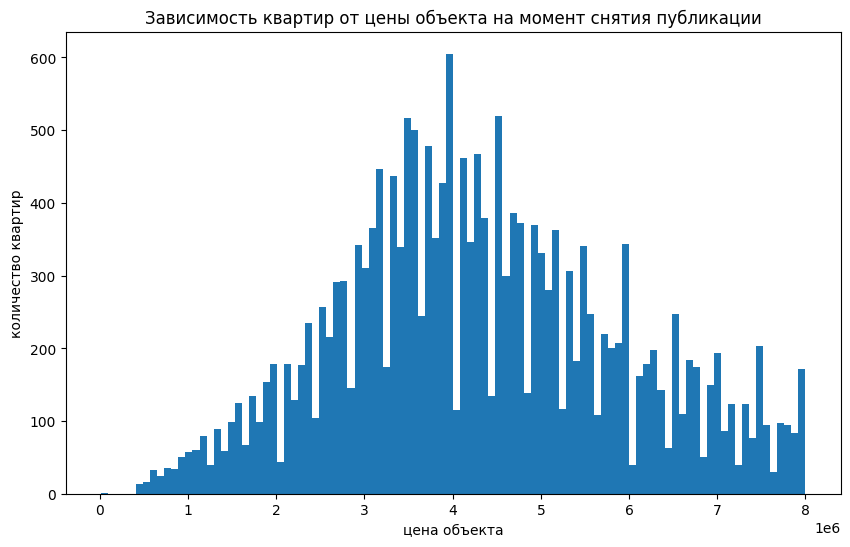

In [67]:
# Построение гистограммы с диапазаноми от 1.219000e+04 до 8.00000e+06
real_estate.last_price \
    .plot(
    title='Зависимость квартир от цены объекта на момент снятия публикации',
    kind='hist', 
    bins=100, 
    range=(1.219000e+04, 8.00000e+06),
    figsize=(10, 6)       
)
plt.xlabel('цена объекта')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** На гистрограмме видно, что больше всего предложений на квартиры в районе 4млн. руб.

## Анализ количества комнат 

In [68]:
real_estate.describe().T[3:4] # Отфильтровываем нужный столбец

,count,mean,std,min,25%,50%,75%,max
rooms,23565.0,2.070656,1.078591,0.0,1.0,2.0,3.0,19.0


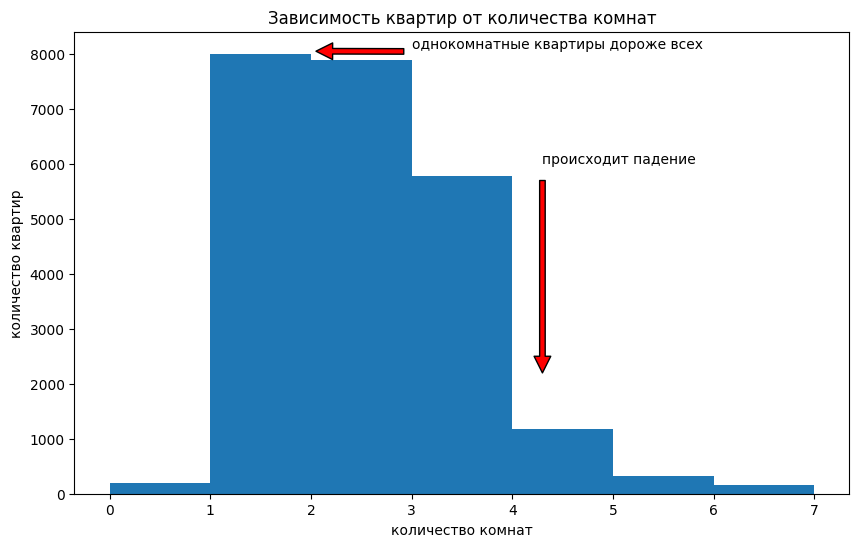

In [69]:
# Построение гистограммы с диапазаноми от 0 до 7
real_estate.rooms \
    .plot(
    title='Зависимость квартир от количества комнат',
    kind='hist', 
    bins=7, 
    range=(0, 7),
    figsize=(10, 6)       
)
plt.annotate("однокомнатные квартиры дороже всех", xy=(2, 8050), xytext=(3, 8100),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate("происходит падение", xy=(4.3, 2000), xytext=(4.3, 6000),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** Больше всего предложения на однокомнатные квартиры, после 4-х комантных квартир спрос спадает.

## Анализ Высоты потолков

In [70]:
real_estate.describe().T[4:5] # Отфильтровываем нужный столбец

,count,mean,std,min,25%,50%,75%,max
ceiling_height,23565.0,2.72453,0.991026,1.0,2.6,2.65,2.7,100.0


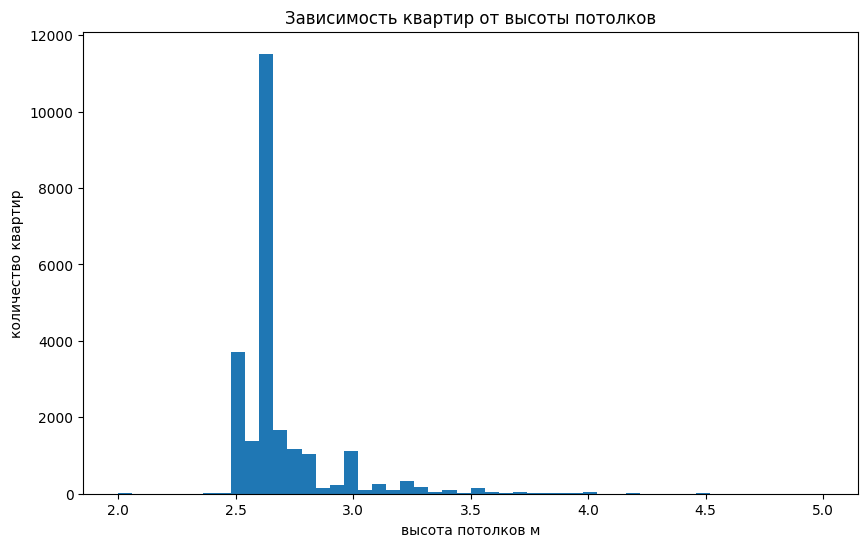

In [71]:
# Построение гистограммы с диапазаноми от 2 до 5
real_estate.ceiling_height \
    .plot(
    title='Зависимость квартир от высоты потолков',
    kind='hist', 
    bins=50, 
    range=(2, 5),
    figsize=(10, 6)       
)
plt.xlabel('высота потолков м')
plt.ylabel('количество квартир')
plt.show()

**Вывод** Построению гистрограммы мешают аномальные значения, нужно сделать срез по диапазонам

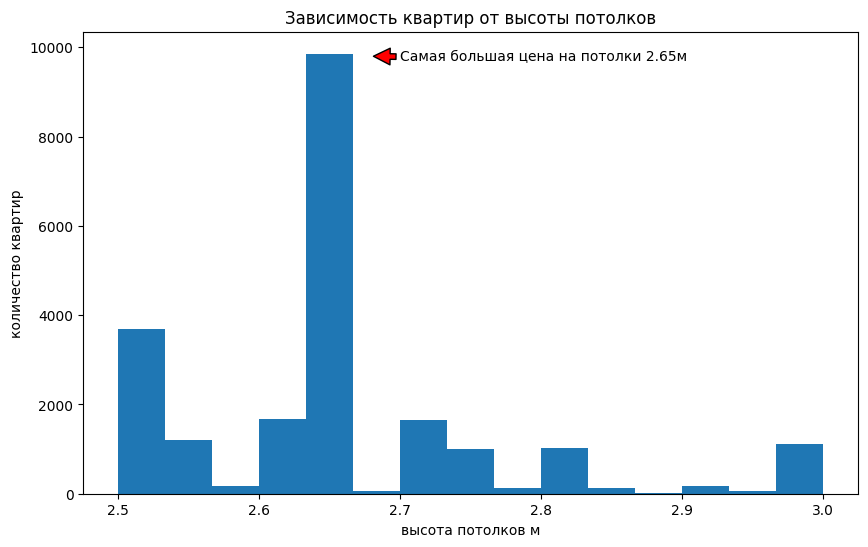

In [72]:
# Делается срез
real_estate.query("(ceiling_height > 2) & (ceiling_height < 4)")['ceiling_height'] \
    .plot(
    title='Зависимость квартир от высоты потолков',
    kind='hist', 
    bins=15, 
    range=(2.5, 3),
    figsize=(10, 6),
)
plt.annotate("Самая большая цена на потолки 2.65м", xy=(2.68, 9800), xytext=(2.7, 9700),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('высота потолков м')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** Как видно на гистрограмме больше всего спрос преобладает на высоту потолков 2.65м.

## Анализ по типу этажа квартиры

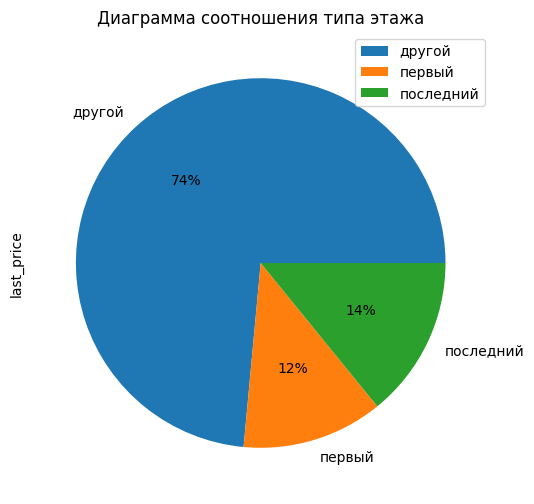

In [73]:
real_estate.pivot_table(index='floor_type', values='last_price', aggfunc='count') \
    .plot(
    title='Диаграмма соотношения типа этажа', 
    x='floor_type',
    y='last_price', 
    kind='pie',
    figsize=(10, 6),
    autopct='%1.0f%%'
)

plt.show()

**Вывод:** Была построена круговая диаграмма по сводной таблице цена/тип этажа, по ней отчётливо видно, что наибольшее предпочтение 74% отдают другим этажам, на втором месте 14% последнему этажу.

## Анализ общего количества этажей в доме

In [74]:
real_estate.describe().T[5:6] # Отфильтровываем нужный столбец

,count,mean,std,min,25%,50%,75%,max
floors_total,23565.0,10.675875,6.594823,1.0,5.0,9.0,16.0,60.0


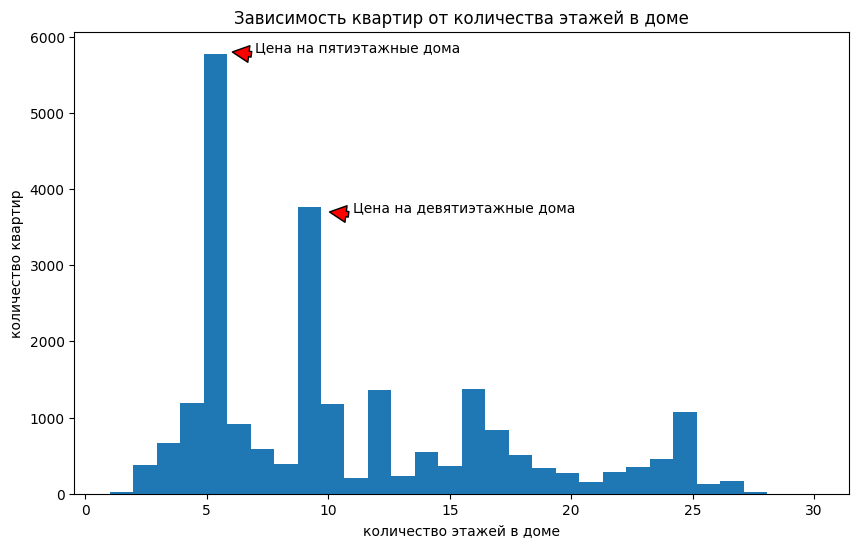

In [75]:
# Построение гистограммы с диапазаноми от 1 до 30
real_estate.floors_total \
    .plot(
    title='Зависимость квартир от количества этажей в доме',
    kind='hist', 
    bins=30, 
    range=(1, 30),
    figsize=(10, 6)       
)
plt.annotate("Цена на пятиэтажные дома", xy=(6, 5800), xytext=(7, 5800),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate("Цена на девятиэтажные дома", xy=(10, 3700), xytext=(11, 3700),
            arrowprops=dict(facecolor='red', shrink=0.05))
plt.xlabel('количество этажей в доме')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** Как видно на гистограмме предпочение отдают пятиэтажным домам, после девятиэтажным.

## Анализ расстояния до центра города в метрах

In [76]:
real_estate.describe().T[11:12] # Отфильтровываем нужный столбец

,count,mean,std,min,25%,50%,75%,max
citycenters_nearest,18064.0,14192.656056,8613.348153,181.0,9238.0,13096.5,16285.0,65968.0


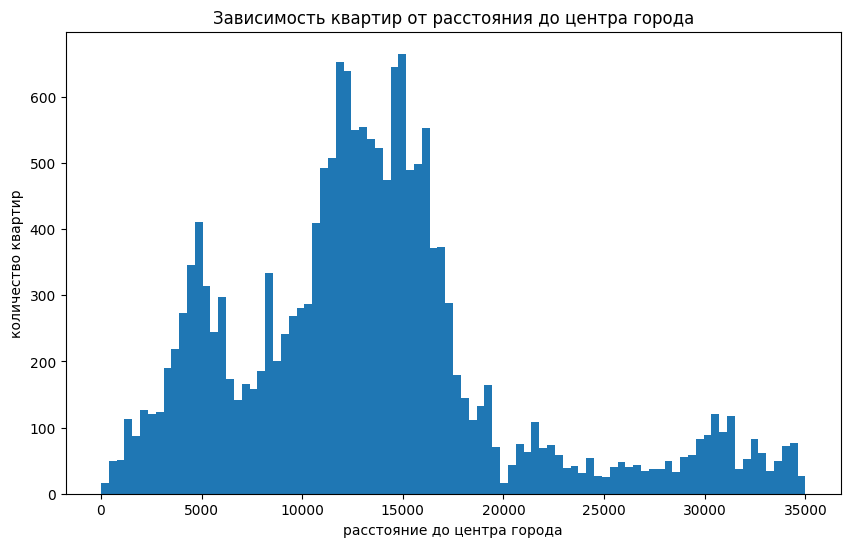

In [77]:
# Построение гистограммы с диапазаноми от 0 до 30000
real_estate.citycenters_nearest \
    .plot(
    title='Зависимость квартир от расстояния до центра города',
    kind='hist', 
    bins=90, 
    range=(0, 35000),
    figsize=(10, 6)       
)
plt.xlabel('расстояние до центра города')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** По удаленности от центра города предложений больше всего на 12000-16000 метров, а так же имеется всплеск на расстоянии 5000 метров.

## Анализ расстояния до ближайшего парка

In [78]:
real_estate.describe().T[13:14] # Отфильтровываем нужный столбец

,count,mean,std,min,25%,50%,75%,max
parks_nearest,8030.0,490.580448,341.572956,1.0,288.0,455.0,612.0,3190.0


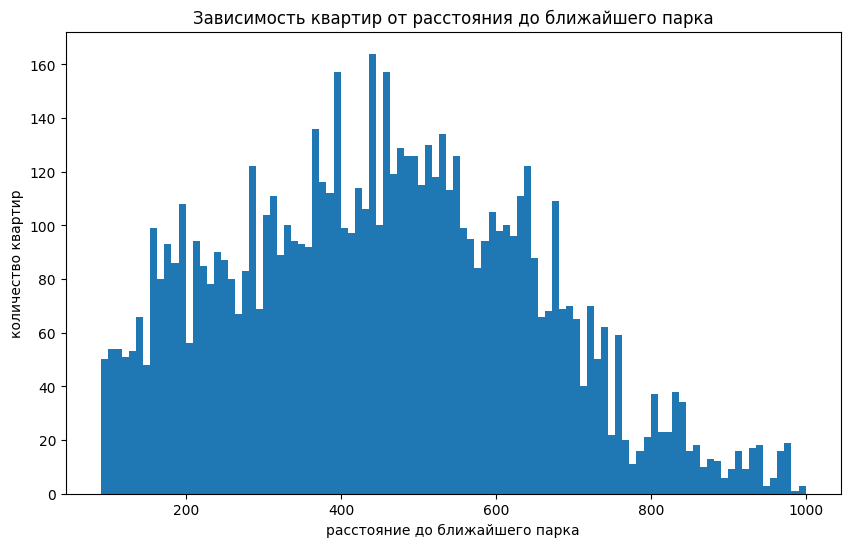

In [79]:
# Построение гистограммы с диапазаноми от 90 до 1000
real_estate.parks_nearest \
    .plot(
    title='Зависимость квартир от расстояния до ближайшего парка',
    kind='hist', 
    bins=100, 
    range=(90, 1000),
    figsize=(10, 6)       
)
plt.xlabel('расстояние до ближайшего парка')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** На гистрограмме видно, что большего всего предложений квартир на расстоянии 450 метров от парка. В среднем предложения составляют 200-700 метров, после 1 километра наблюдается сильный спад.

In [80]:
print('DataFrame Shape :', shape)
print('Число строк :', shape[0])
print('Число столбцов :', shape[1])

DataFrame Shape : (23699, 22)
Число строк : 23699
Число столбцов : 22


<div class="alert alert-info"; style="border-left: 3px solid SteelBlue">
<h4><font color="#FFA500">Вывод по разделу:</font></h4>    

1. Самое большое предложение находится в диапазоне от 40 до 69 квадратных метров.

2. Большинство предложений включают жилую площадь от 18 до 30 квадратных метров.

3. Наибольшее количество предложений связано с кухнями площадью 6 квадратных метров.

4. Основная масса предложений сосредоточена в районе 4 миллионов рублей.

5. Наибольшее количество продаж приходится на однокомнатные квартиры.

6. В основном предлагаются квартиры с потолками высотой 2,65 метра.

7. Предложения на первом и последнем этажах не пользуются большим спросом.

8. Предпочтение отдаётся пятиэтажным домам, затем девятиэтажным.

9. Большая часть предложений расположена на расстоянии 12–16 тысяч метров от центра города или 5 тысяч метров, что соответствует спальным районам.

10. Квартиры рядом с парками имеют значительное количество предложений. 
«Квартира в пятиэтажном или девятиэтажном доме, средняя площадь составляет 55 квадратных метра, кухня — 6 квадратных метров, высота потолков — 2,65 метра. Вероятно, это однокомнатная или двухкомнатная квартира с небольшими комнатами, расположенная на расстоянии 13 километров от центра города».
</div>

## Изучение продажи квартир по столбцу `days_exposition`

In [81]:
real_estate.describe().T[16:17] # Отфильтровываем нужный столбец

,count,mean,std,min,25%,50%,75%,max
days_exposition,20394.0,180.741395,219.732782,1.0,45.0,95.0,231.0,1580.0


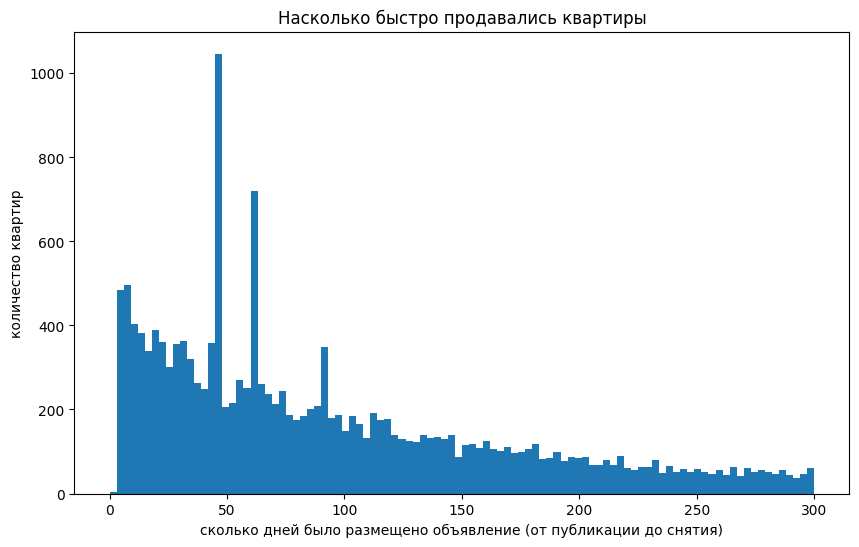

In [82]:
real_estate.days_exposition \
    .plot(
    title='Насколько быстро продавались квартиры',
    kind='hist', 
    bins=100, 
    range=(0, 300),
    figsize=(10, 6)       
)
plt.xlabel('сколько дней было размещено объявление (от публикации до снятия)')
plt.ylabel('количество квартир')
plt.show()

**Вывод:** Наиболее быстрые продажи происходили в течение 45 дней, в то время как самые долгие продажи занимали 232 дня. Медианное значение составляет 95 дней, а среднее значение — 180 дней.

## Зависимость цены от общей площади

In [83]:
print('Коэфициент корреляции зависимости столбцов:','\n')
print(real_estate.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms','day_publication','month_publication','year_publication']).corr(),'\n')

Коэфициент корреляции зависимости столбцов: 

                   day_publication  kitchen_area  last_price  living_area  \
day_publication           1.000000      0.485810    0.323774     0.067979   
kitchen_area              0.485810      1.000000    0.308038     0.114637   
last_price                0.323774      0.308038    1.000000     0.626808   
living_area               0.067979      0.114637    0.626808     1.000000   
month_publication         0.266523     -0.024843   -0.020620    -0.162146   
rooms                    -0.050210      0.148280    0.442934     0.899188   
total_area                0.323855      0.432529    0.739123     0.919429   
year_publication          0.176499     -0.309330   -0.055089    -0.063232   

                   month_publication     rooms  total_area  year_publication  
day_publication             0.266523 -0.050210    0.323855          0.176499  
kitchen_area               -0.024843  0.148280    0.432529         -0.309330  
last_price             

In [84]:
print('Коэфициент корреляции зависимости столбцов:','\n')
print(real_estate.pivot_table(index='floor', values=['last_price','total_area','living_area','kitchen_area','rooms']).corr(),'\n') # Расчет коэфициента корреляции

Коэфициент корреляции зависимости столбцов: 

              kitchen_area  last_price  living_area     rooms  total_area
kitchen_area      1.000000    0.308038     0.114637  0.148280    0.432529
last_price        0.308038    1.000000     0.626808  0.442934    0.739123
living_area       0.114637    0.626808     1.000000  0.899188    0.919429
rooms             0.148280    0.442934     0.899188  1.000000    0.811611
total_area        0.432529    0.739123     0.919429  0.811611    1.000000 



**Вывод:** Как видно по расчёту коэфициента корреляци между ценой и общей площадью, общей жилой площадью, площадью кухни, количества комнат прямой зависимости нет, возможно из за наличия выбивающихся значений.

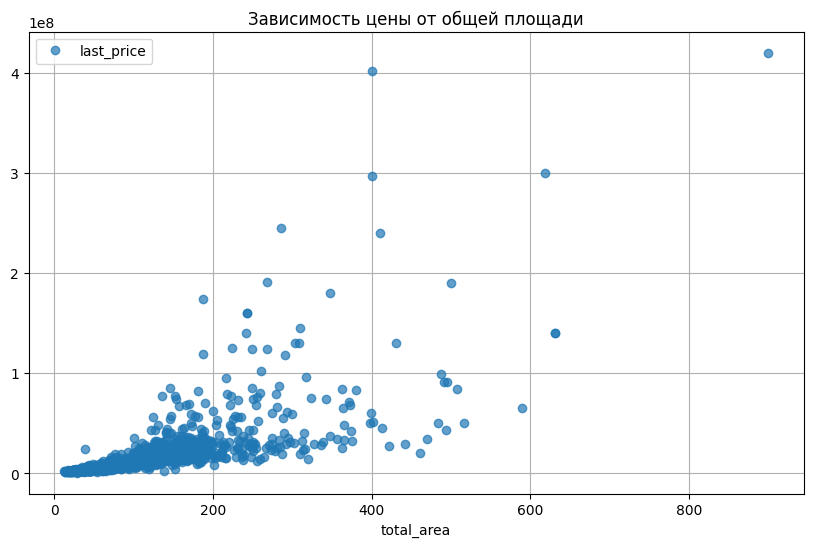

In [85]:
real_estate.pivot_table(index='total_area', values='last_price') \
    .plot(
    title='Зависимость цены от общей площади', 
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.7
)
plt.show()

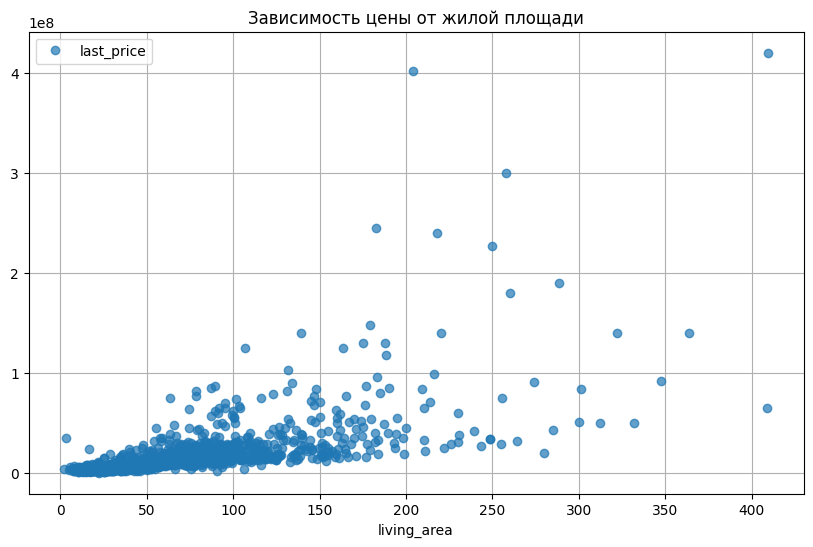

In [86]:
real_estate.pivot_table(index='living_area', values='last_price') \
    .plot(
    title='Зависимость цены от жилой площади', 
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.7
)
plt.show()

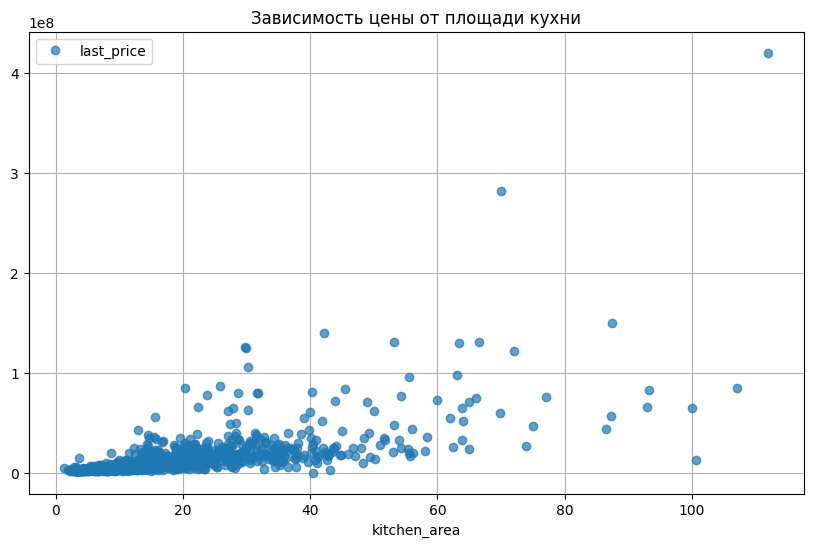

In [87]:
real_estate.pivot_table(index='kitchen_area', values='last_price') \
    .plot(
    title='Зависимость цены от площади кухни', 
    grid=True,
    style='o',
    figsize=(10, 6),
    alpha=0.7
)
plt.show()

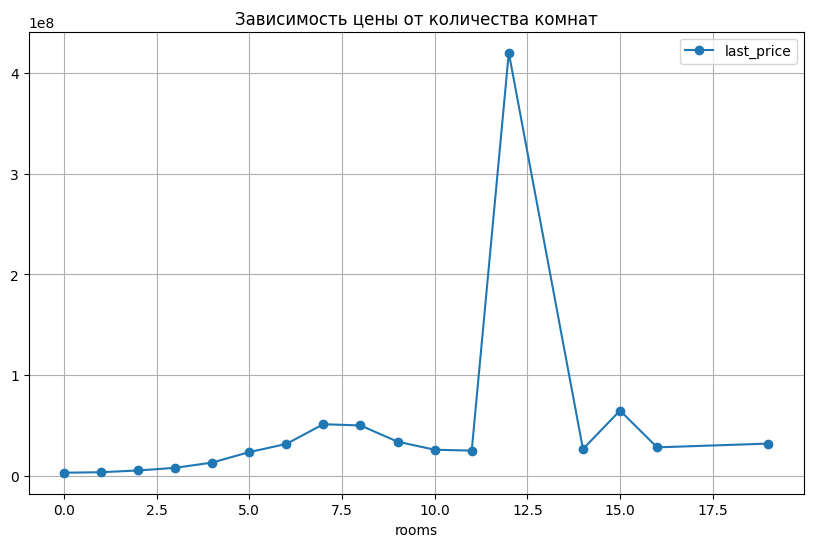

In [88]:
real_estate.pivot_table(index='rooms', values='last_price') \
    .plot(
    title='Зависимость цены от количества комнат', 
    grid=True,
    style='o-',
    figsize=(10, 6),
)
plt.show()

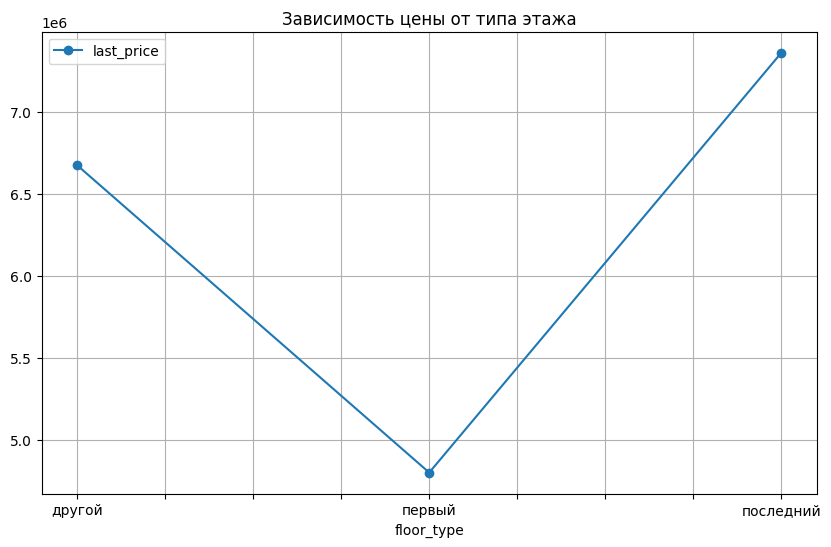

In [89]:
real_estate.pivot_table(index='floor_type', values='last_price') \
    .plot(
    title='Зависимость цены от типа этажа', 
    grid=True,
    style='o-',
    figsize=(10, 6)
)
plt.show()

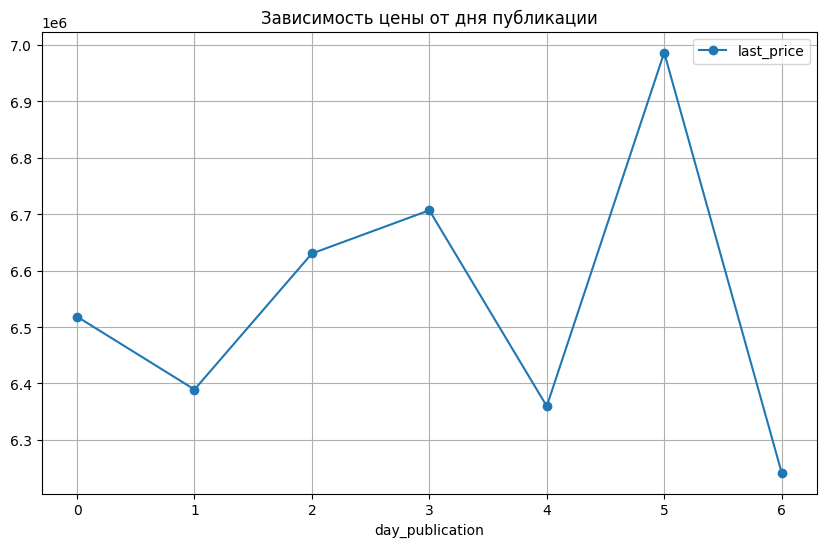

In [90]:
real_estate.pivot_table(index='day_publication', values='last_price') \
    .plot(
    title='Зависимость цены от дня публикации', 
    grid=True,
    style='o-',
    figsize=(10, 6),
)
plt.show()

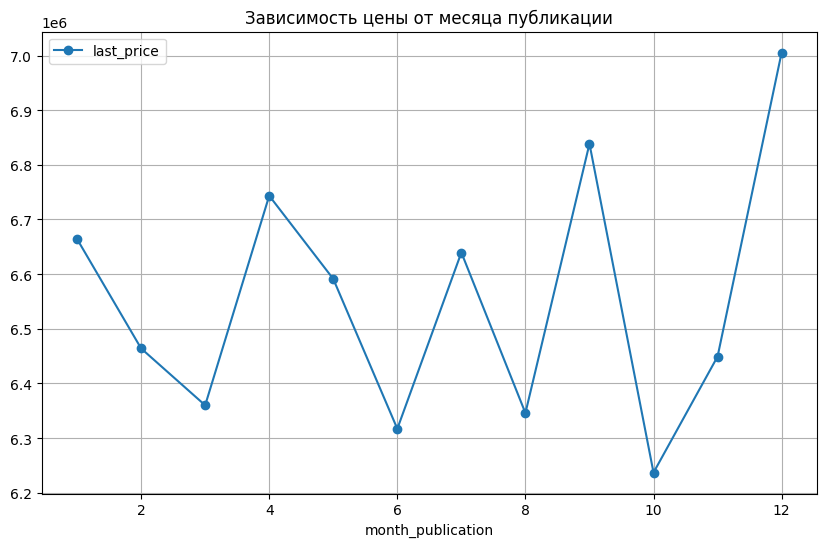

In [91]:
real_estate.pivot_table(index='month_publication', values='last_price') \
    .plot(
    title='Зависимость цены от месяца публикации', 
    grid=True,
    style='o-',
    figsize=(10, 6),   
)
plt.show()

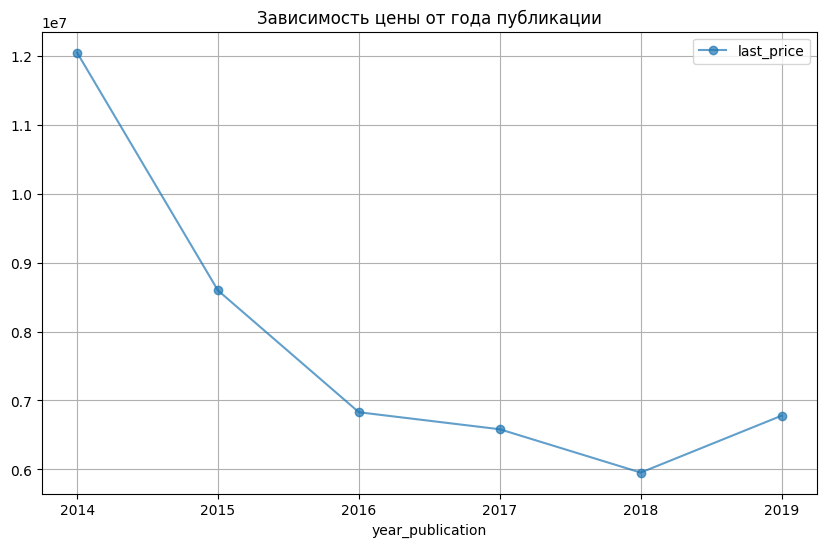

In [92]:
real_estate.pivot_table(index='year_publication', values='last_price') \
    .plot(
    title='Зависимость цены от года публикации', 
    grid=True,
    style='o-',
    figsize=(10, 6),
    alpha=0.7,
)
plt.show()

<div class="alert alert-info"; style="border-left: 3px solid SteelBlue">
<h4><font color="#FFA500">Вывод по разделу:</font></h4>    
Из диаграммы видно, что стоимость квартиры возрастает вместе с её общей площадью. Влияние жилой площади на цену несколько меньше. Квартиры на первом этаже считаются более дешёвым вариантом, в то время как последний этаж имеет чуть более высокую стоимость. Однако покупатели предпочитают выбирать другие этажи.
    
Чем дольше объявление находится в публикации, тем стоимость ниже, это демонстрируют графики завимости цены от дня публикации, месяца публикации и года публикации. Как видно из графика зависимости цены от года публикации рынок недвижимости цикличен и стоимость недвижимости с годами может увеличится на подъёме рынка недвижимости. Месяц публикации достаточно сильно может влиять на цену, так как активность покупателей в некоторые месяцы выше, например по графику видно подъёмы весной и осенью, а летом спад.
</div>

## Создание таблицы с самой высокой и низкой ценой за квадратный метр в 10 населеных пунктах с наибольшим количством объявлений

In [93]:
locality = real_estate.pivot_table(index='locality_name', values='last_price', aggfunc=['count']) #  Создание сводной таблицы

In [94]:
locality.columns = ['count']

In [95]:
locality['price_of_metre'] = real_estate.pivot_table(index='locality_name', values='price_of_metre').round(2)

In [96]:
locality.sort_values(by=['price_of_metre'], ascending=False).head(10) # Сортируем таблицу по убыванию за цену квадратного метра

,count,price_of_metre
locality_name,,
зеленогорск,24,115122.80
санкт-петербург,15651,114868.88
репино,4,104238.61
пушкин,369,103125.82
сестрорецк,183,101757.62
нос,3,100660.82
мистолово,11,98549.98
левашово,1,96997.69
кудрово,470,95260.85


**Вывод** Самая высокая цена за квадратный метр оказалась в Зеленогорске, дальше идет Санк-Петербург, самая наименьшая из топ 10 в кудрово и парголово.

## Вычисление средней стоиомости квартиры в Санк-Петербурге по удалении от центра

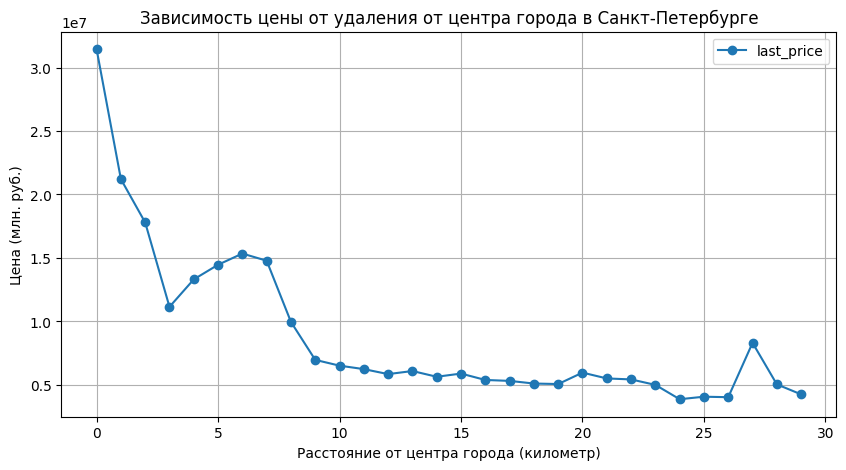

In [97]:
real_estate.query('locality_name == "санкт-петербург"') \
    .pivot_table(index='distance_to_center', values='last_price') \
    .plot(
        title = 'Зависимость цены от удаления от центра города в Санкт-Петербурге',
        grid=True, 
        style='o-',          
        figsize=(10, 5))

plt.xlabel('Расстояние от центра города (километр)')
plt.ylabel('Цена (млн. руб.)')
plt.show()

In [98]:
real_estate.query('locality_name == "санкт-петербург" and distance_to_center<10') \
    .pivot_table(values='last_price', index='distance_to_center')

,last_price
distance_to_center,
0.0,3.144912e+07
1.0,2.120672e+07
2.0,1.778832e+07
3.0,1.113739e+07
4.0,1.330428e+07
5.0,1.445600e+07
6.0,1.533842e+07
7.0,1.477515e+07
8.0,9.949111e+06


**Вывод:** Судя по графику и таблице, стоимость уменьшается по мере удаления от центра Санкт-Петербурга. Есть небольшой скачок на расстоянии 20км, далее стоимость опять снижается.

# Общий вывод
<div class="alert alert-info"; style="border-left: 3px solid SteelBlue">
<h4><font color="#FFA500">Общий вывод:</font></h4>    

1. При открытии таблицы было вявлено, что в предоставленной выборке объёмом 23 699 записей присутствуют пропущенные значения и некорректные типы данных для некоторых столбцов. Гистограммы демонстрируют наличие аномальных значений в данных. Отсутствие явных дубликатов указывает на полноту и достаточность информации для проведения исследования.
    
2. В процессе обработки данных были найдены и удалены или заменены пропуски там, где это возможно, был переимнован столбец `cityCenters_nearest` и приведен к нижнему регистру. Были убраны дублирующие значения в столбце `locality_name`. Выявлены причины пропусков: человеческий фактор (не заполняли определенные графы при вводе), программное обеспечение (автоматическое заполнение системой), возможно раннее введенные данные не откорректировались.

3. Добавлены новые столбцы `price_of_metre` - цена за один квадратный метр, `day_publication` - день недели публикации, `month_publication` - месяц публикации, `year_publication` - год публикации,  `floor_type` - тип этажа квартиры, `distance_to_center` - расстояние до центра города в километрах.

4. Проведен исследовательский анализ и построение графиков и диаграмм. Было выяснено, что самое большое предложение составляет однокомнатные квартиры с небольшой кухней и высотой потолков 2.65м, а так же удаленные от центра города в спальных районах. Большое предпочтение отдается пятиэтажным домам, после девятиэтажным. В основном ни первый и ни последний этаж. Самые быстрые продажи происходили за 45 дней, самые долгие составляли 232 дня.

5. Определены факторы, влияющие на продажу квартиры: чем больше общая площадь, тем дороже цена, в основном 40м² и заканчивается после 69 м². Определено, что жилая площадь 18м² и 30м² имеют самый высокий пик продаж, квартиры с жилой площадью 23м² - наименьший, значит продаются хуже. Самое большое предложение имеют квартиры с кухней 6м², затем 10м², затем 8м², 9м², 7м², 11м² и 12м². Больше всего предложений на квартиры в районе 4млн. руб. Количество комнат влияет на цену, больше всего предложений на однокомнатные квартиры, с увеличение комнат предложение ниже. Расчитан коэфициент корреляции зависимости столбцов и построены графики и гистограммы.

6. Была посчитана средняя стоимость м² в 10 населенных пунктах с наибольшим количеством объявлений. Наибольшая стоимость зеленогорске, наименьшая в в кудрово и парголово. Расчитана зависимость по удалению от центра города в Санкт-Петербурге, чем ближе центр тем дороже квартиры.
    
7. Проверено количество строк и столбцов.
    
</div>